# Домашняя работа Пехтерева Дениса МСКМ-181

Наблюдаемые состояния: от 1 до 6 [M]

Конечный набор скрытых состояний: Честная кость или нет. [2]

Априорная вероятность (pi) : Вероятность того, что бросок честный или нет: представлено матрицей 1x2.

Transition Matrix (A): $\mathbf{A}=\{a_{ij},1\leq i,j \geq N\}$ Матрица перехода из одного скрытого состояния в другое, возможные комбинции: 
Fair-> Fair, Fair-> Biased, Biased-> Fair and Biased->Biased, представлена матрицей 2x2.

$ a_{ij} = P(s_{t} =j \mid s_{t-1}=i) $

Emission Matrix (B): $\mathbf{B} =\{b_j(k)\}$ Матрица вероятностей наступления наблюдений, задаётся матрицей 2 X 6.

$ b_j(k) = p(y_t = k  \mid  s_t=j) $

Вероятности начального состояния $\mathbf{\pi}  = \{\pi_i \}$ с указанием вероятности каждой скрытой переменной. 


Состоит из набора наблюдаемых переменных
X = {x1, . . . , xN}, xn ∈ R
d и латентных (скрытых)
переменных T = {t1, . . . , tN}, tn ∈ {0, 1}

Латентные переменные T являются бинарными и кодируют K состояний, поэтому их иногда называют переменными состояния.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams.update({'font.size': 10})

In [2]:
# Pi : Честный появляется в два раза чаще нечестного


pi=np.array([2/3,1/3])  # поэтому 2/3
A=np.array([[0.95,0.05],[0.1,0.9]]) # sum = 1 # вероятности переходов
B=np.array([[1/6 for i in range(6)],[0.1,0.1,0.1,0.1,0.1,0.5]]) # эмисионная матрица

print (pi)
print (A)
print (B)

[0.66666667 0.33333333]
[[0.95 0.05]
 [0.1  0.9 ]]
[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]


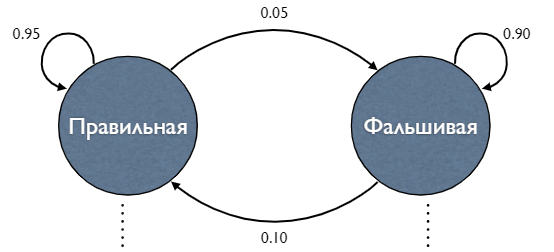

Теперь нам нужно задать последовательности скрытых и наблюдаемые значений.

! Здесь опираемся на то, что те явления, которые имеют большую вероятность, относительно с такой же вероятностью и произойдут. !

Это логично, например, рассмотрим вектор pi: вероятность того, что мы стартуем с честного состояния вдвое больше, чем со смещённого (поддельного) состояния. Отсюда следует, что мы будем начинать с честного состояния.

Можно сказать, что мы испольузем пропорциональный отбор по пригодности Fitness Proportionate Selection (для "производства" состояний исходя из их вероятностей)

Алгоритм функции next_state:
1) выбираем случайное значение от 0 до 1
2) перебираем список значений (предыдущий) и итеративно вычитаем значение в текущей позиции из числа, которое мы выбрали случайным образом, и как только оно становится отрицательным, мы возвращаем индекс.

In [3]:
def next_state(weights):
    choice = random.random() * sum(weights)
    for i, w in enumerate(weights):
        choice -= w # значение весов вычитаем из рандома
        if choice < 0: # и когда получаем отриц. рез-т
            return i # возвращаем индекс

In [4]:
# проверим, что функции корректно работает и выдаёт значения, которые описаны функцией вероятности

count=0
for i in range(1000):
    count+=next_state(pi)
print ("Количество нормальных состояний:", 1000-count)
print ("Количество поддельных сост-й:", count)

Количество нормальных состояний: 682
Количество поддельных сост-й: 318


    сreate_hidden_sequence (pi,A,length):
 создаёт последовательность заданной длины.
 
Кратко: выбираем первое состояние. Затем, используя переходную матрицу, присваиваем следующее состояние (+взвешивая результаты)
    

    create_observed_sequence (hidden_sequence,B): 

Кратко: создаёт последовательность наблюдений, используя скрытые состояния и матрицу эммисии.

In [5]:
def create_hidden_sequence(pi,A,length):
    out=[None]*length
    
    out[0]=next_state(pi)
    for i in range(1,length):
        out[i]=next_state(A[out[i-1]]) # используем матрицу переходов из состояние в состояние
    return out
   
def create_observation_sequence(hidden_sequence,B):
    length=len(hidden_sequence)
    out=[None]*length
    for i in range(length):
        out[i]=next_state(B[hidden_sequence[i]])
    return out

In [6]:
hidden=np.array(create_hidden_sequence(pi,A,1000))
observed=np.array(create_observation_sequence(hidden,B))

Okay, so in our case we have:


In [7]:
m, k, l = 2, 6, 100

In [8]:
sts_matr = A # обозначения из задания
em_matr = B
pi = np.array([0.5, 0.5]) # события равновероятны

In [9]:
hidden=np.array(create_hidden_sequence(pi,sts_matr,l))
observed=np.array(create_observation_sequence(hidden,em_matr))

In [10]:
hidden

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

## Алгоритм Витерби


In [11]:
def viterbi(y, A, B, Pi):
    """
    Return the MAP estimate of state trajectory of Hidden Markov Model.

    Parameters
    ----------
    y : array (T,)
        Observation state sequence.
    A : array (K, K)
        State transition matrix.
    B : array (K, M)
        Emission matrix. See HiddenMarkovModel.emission for details.
    Pi: optional, (K,)
        Initial state probabilities: Pi[i] is the probability x[0] == i.

    Returns
    -------
    x : array (T,)
        Maximum a posteriori probability estimate of hidden state trajectory,
        conditioned on observation sequence y under the model parameters A, B,
        Pi.
    T1: array (K, T)
        the probability of the most likely path so far
    T2: array (K, T)
        the x_j-1 of the most likely path so far
    """
    K = A.shape[0]
    T = len(y)
    T1 = np.empty((K, T), 'd')
    T2 = np.empty((K, T), 'B')

    # Initilaize the tracking tables from first observation
    T1[:, 0] = Pi * B[:, y[0]]
    T2[:, 0] = 0

    # Iterate throught the observations updating the tracking tables
    for i in range(1, T):
        T1[:, i] = np.max(T1[:, i - 1] * A.T * B[np.newaxis, :, y[i]].T, 1)
        T2[:, i] = np.argmax(T1[:, i - 1] * A.T, 1)

    # Build the output, optimal model trajectory
    x = np.empty(T, 'B')
    x[-1] = np.argmax(T1[:, T - 1])
    for i in reversed(range(1, T)):
        x[i - 1] = T2[x[i], i]

    return x, T1, T2

In [12]:
viterbi_result = viterbi (observed, sts_matr, em_matr,pi)

In [13]:
x_viterbi = viterbi_result[0]

Посмотрим на то, что сгенерировала реализация HMM и Витерби

In [14]:
x_viterbi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [15]:
hidden

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Переходы между честной и нечесткой костями')

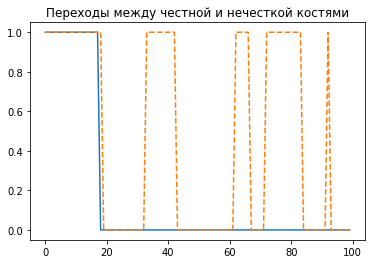

In [16]:
fig = plt.figure()

plt.plot (x_viterbi)
plt.plot (hidden, '--')
plt.title ("Переходы между честной и нечесткой костями")

# ось x -- номера наблюдений

## Алгоритм прямого хода.

$% <![CDATA[
\begin{aligned} 
P(Y \mid \lambda) &= \displaystyle \sum_{i=1}^{N} P(y_1,\ldots y_T, s_T = i \mid \lambda) = \displaystyle \sum_{i=1}^{N}\alpha _T(i)  
\end{aligned} %]]>$

In [38]:
# A.shape[0]
# np.zeros((len(observed), 100))[1]


In [44]:
def forward_obs(observed, A, B):
    T = len(observed)
    
    N = A.shape[0] # определяем размерность матрицы
    
    alpha = np.zeros((T, N)) # создаём матрицу заданной размерности
    
    alpha[0] = pi*B[:, observed[0]] # умножаем первый столбец эммисионной матрицы
    
    for t in range(1, T):
        alpha[t] = alpha[t-1].dot(A) * B[:, observed[t]]
    return alpha

In [45]:
alpha = forward_obs(observed, A, B)

alpha[len(observed)-1].sum()  #7.230524048289464e-75

7.230524048289464e-75

## Алгоритм обратного хода

$% <![CDATA[
\begin{aligned}
\beta_{0} & = P(Y \mid \lambda) \\
& = \displaystyle \sum_{i=1}^{N} P(y_1,\ldots y_T, s_1=i) \\
&= \displaystyle \sum_{i=1}^{N} P(y_1,\ldots y_T \mid s_1=i)\cdot P(s_1=i) \\
& = \displaystyle \sum_{i=1}^{N} P(y_1 \mid s_1=i)\cdot P(y_2,\ldots y_T \mid s_1=i)\cdot P(s_1=i) \\
& = \displaystyle \sum_{i=1}^{N} \pi _i b_i(y_1)\beta _1(i)
\end{aligned} %]]>$

In [46]:
def backward_obs(observed, A, B):
    N = A.shape[0]
    T = len(observed)

    beta = np.zeros((N, T))
    beta[:, -1:] = 1

    for t in reversed(range(T-1)):
        for n in range(N):
            beta[n, t] = np.sum(beta[:, t+1] * A[n, :] * B[:, observed[t+1]])

    return beta

In [47]:
# beta = backwardprobs (observed+1, sts_matr,em_matr, 2, obs_indices)
beta = backward_obs(observed, A, B)

beta

array([[1.49465707e-74, 5.27077919e-74, 2.41656508e-73, 1.33129295e-72,
        6.27867583e-72, 1.60878740e-71, 4.95263177e-71, 1.98220743e-70,
        1.00317131e-69, 5.81706073e-69, 3.11575606e-68, 1.35557658e-67,
        7.24329620e-67, 3.12829629e-66, 1.66407147e-65, 9.87501904e-65,
        5.56394064e-64, 3.38432280e-63, 2.12103855e-62, 1.32912207e-61,
        8.32669124e-61, 5.21416179e-60, 3.26245450e-59, 2.03830603e-58,
        1.27012151e-57, 7.87644042e-57, 4.84137312e-56, 2.92680200e-55,
        1.71307189e-54, 9.36936369e-54, 4.33167127e-53, 2.39740751e-52,
        1.14486403e-51, 3.14591649e-51, 1.08550847e-50, 4.88130830e-50,
        2.65969987e-49, 1.21666804e-48, 6.69416098e-48, 4.03145396e-47,
        2.34161155e-46, 1.44188465e-45, 8.74636710e-45, 5.15385773e-44,
        3.19147304e-43, 1.95644729e-42, 1.17673252e-41, 6.81721269e-41,
        4.19351322e-40, 2.53883187e-39, 1.58838315e-38, 9.92225613e-38,
        6.18101499e-37, 3.83101019e-36, 2.35246610e-35, 1.419492

In [49]:
def likelihood(observed, A, B):
        # using the forward part of the forward-backward algorithm
        # используем last row
        return forward_obs(observed, A, B)[len(observed)-1].sum()


def gamma(observed, alpha, beta, A, B):
    observed_probability = likelihood(observed, A, B)
    return (np.multiply(alpha, beta.T) / observed_probability)


# сглаживающая функция, учитывающая два алгоритма forwardprobs backwardprobs
Gamma = gamma(observed, alpha, beta, A, B)

$\gamma_t(i) = \frac{\alpha _t(i) \cdot \beta _t(i)}{P(Y \mid \lambda)}$

$P(Y \mid {\lambda}) =  \displaystyle \sum_{i=1}^{N}\alpha _T(i)$

In [50]:
check_gamma_lst = []
for i in range(len(Gamma)):
    check_gamma_lst.append(sum(Gamma[i]))

checker = sum(check_gamma_lst)/len(check_gamma_lst)
print(f'Average sum is {checker}')

Average sum is 1.0


Text(0.5, 1.0, 'Posterior Probabilies')

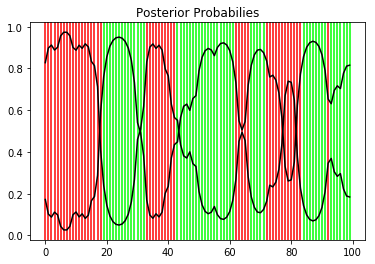

In [51]:
for i in range(100):
    if hidden[i] == 0:
        plt.axvline(x=i, color='lime')  # честная кость
    else:
        plt.axvline(x=i, color='red')  # поддельное состояние
plt.plot([i for i in range(100)], Gamma, color='black')

plt.title ('Posterior Probabilies')

Resourses:
- https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D1%8B%D0%B5_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8
- http://neerc.ifmo.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%92%D0%B8%D1%82%D0%B5%D1%80%D0%B1%D0%B8
- https://nipunbatra.github.io/blog/2013/hmm_simulate.html
- https://en.wikipedia.org/wiki/Viterbi_algorithm#Pseudocode
- http://www.stanford.edu/class/stats366/hmmR2.html

- https://docplayer.ru/38529107-Skrytye-markovskie-modeli.html

- https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%85%D0%BE%D0%B4%D0%B0

- https://stackoverflow.com/questions/9729968/python-implementation-of-viterbi-algorithm

- https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%85%D0%BE%D0%B4%D0%B0

# Учебные материалы

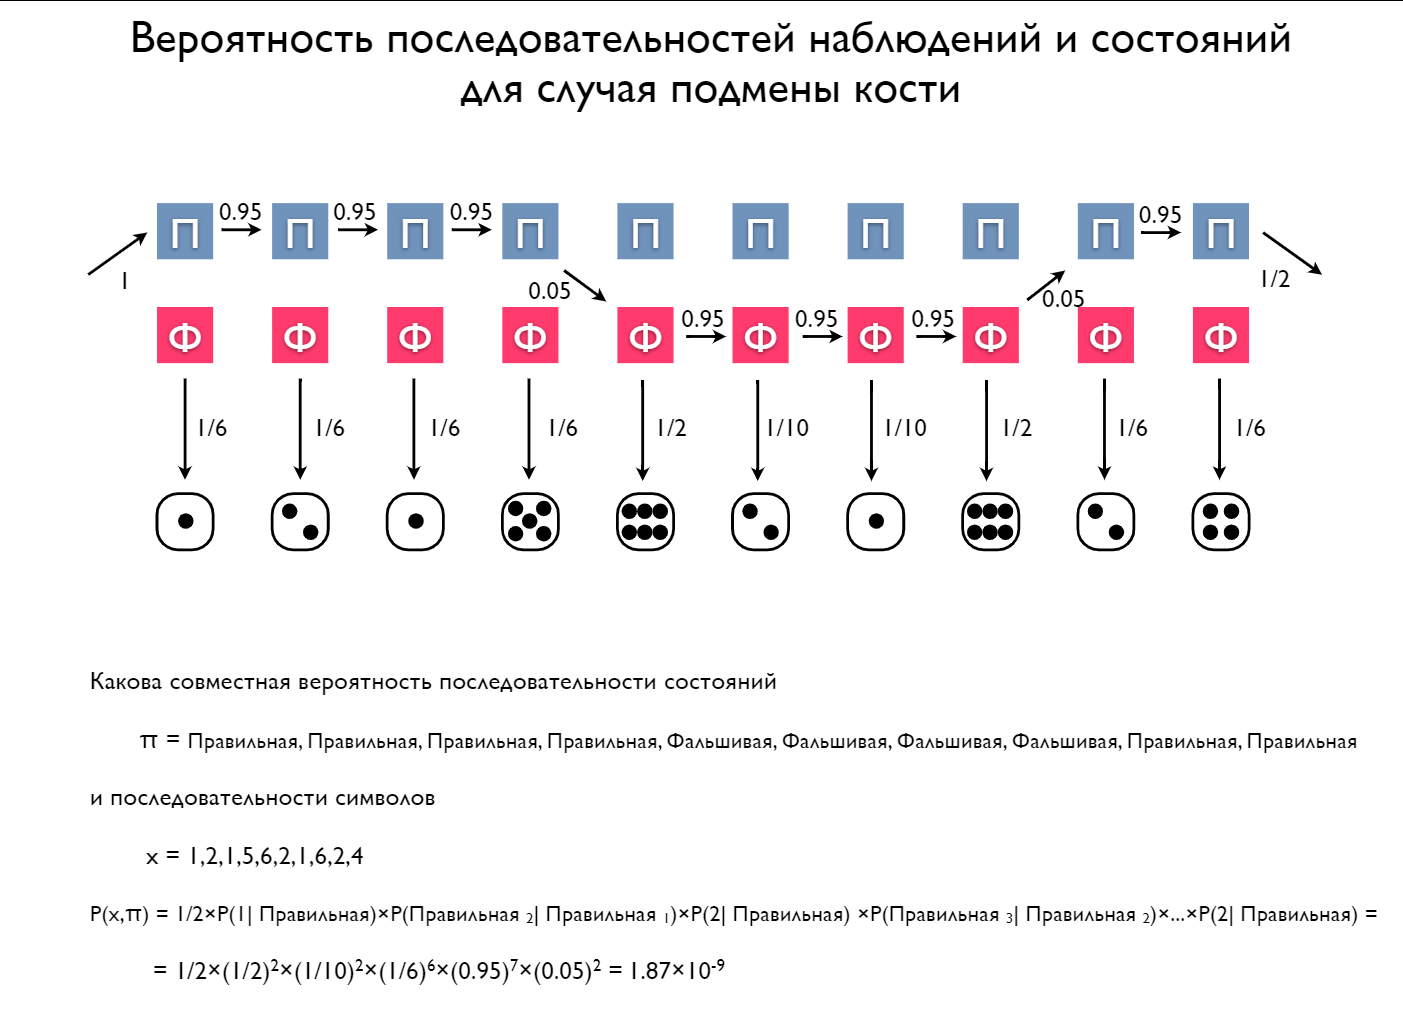

## Отличный пример:
Представим двух друзей, обсуждающих каждый вечер по телефону, что они сегодня делали днём. Ваш друг может делать лишь три вещи: гулять в парке, ходить за покупками или убираться в комнате. Его выбор основывается лишь на погоде, которая была в момент принятия решения. Вы ничего не знаете о погоде в том регионе, где живёт ваш друг, но вы можете, основываясь на его решениях, попытаться угадать, какая погода была.

Погода представима в виде марковской цепи, она имеет два состояния: солнечно или дождливо, но вы не можете сами увидеть её, поэтому она скрыта от вас. Каждый день ваш друг принимает одно из трёх возможных решений: прогулка, покупки или уборка. Вы можете узнать о решении вашего друга, поэтому это наблюдаемое значение. В целом мы получаем СММ.